In [37]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
from numpy import savetxt

In [38]:
def readFile(file):
    fullData = read_csv(file, engine='python')
    return fullData


def get_train_test(dataSet, scaler, split_percent=0.8):
    data = np.array(dataSet.values.astype('float32'))
    data = data.reshape(-1, 1)
    # scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(86952)]
    test_data = data[86952:]
    return train_data, test_data, data


def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y


def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

    # Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Hours since 12am Jan 1, 2011')
    plt.ylabel('Number of Vehicles')
    plt.title(
        'Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
    plt.show()


In [39]:
# Read & Seperate Data by junciton
traffic_data = 'I_66E_to_Glebe.csv'
junctions = readFile(traffic_data)
scaler = MinMaxScaler(feature_range=(0, 1))


print(junctions)

train_data, test_data, data = get_train_test(junctions['Hour_Volume'], scaler)

# print(train_data)
# print(test_data)
# savetxt('train_data.csv', train_data, delimiter=',')
# savetxt('data.csv', data, delimiter=',')

time_steps = 1
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps, 1),
                activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# undo transform
unscaled_train_predict = scaler.inverse_transform(train_predict)
unscaled_test_predict = scaler.inverse_transform(test_predict)

array_trainY = trainY.reshape(-1,1)
array_testY = testY.reshape(-1,1)

unscale_trainY = scaler.inverse_transform(array_trainY)
unscale_testY = scaler.inverse_transform(array_testY)



       Index  Record_Type  State_Code F_System  Station_Id  Travel_Dir  \
0          0            3          51       1U       90106           3   
1          1            3          51       1U       90106           3   
2          2            3          51       1U       90106           3   
3          3            3          51       1U       90106           3   
4          4            3          51       1U       90106           3   
...      ...          ...         ...      ...         ...         ...   
94954  94963            3          51       1U       90106           3   
94955  94964            3          51       1U       90106           3   
94956  94965            3          51       1U       90106           3   
94957  94966            3          51       1U       90106           3   
94958  94967            3          51       1U       90106           3   

       Travel_Lane  Year_Record  Month_Record  Day_Record  Day_of_Week  \
0                0           11      

Unscaled train Predict
[[1006.11926]
 [1341.0032 ]
 [ 963.39954]
 ...
 [ 404.9346 ]
 [ 511.95618]
 [ 532.3474 ]]
Unscaled Test Predict
[[ 894.8385]
 [1219.4506]
 [1645.7919]
 ...
 [2247.073 ]
 [2120.869 ]
 [1821.311 ]]
Train Predict
[[0.25323918]
 [0.33752912]
 [0.24248667]
 ...
 [0.10192163]
 [0.12885885]
 [0.1339913 ]]
Test Predict
[[0.22522993]
 [0.30693445]
 [0.41424412]
 ...
 [0.565586  ]
 [0.5338205 ]
 [0.45842212]]
RMSE Error
Train RMSE: 0.114 RMSE
Test RMSE: 0.101 RMSE
Unscaled Error
Train RMSE: 453.668 RMSE
Test RMSE: 399.733 RMSE
Plot


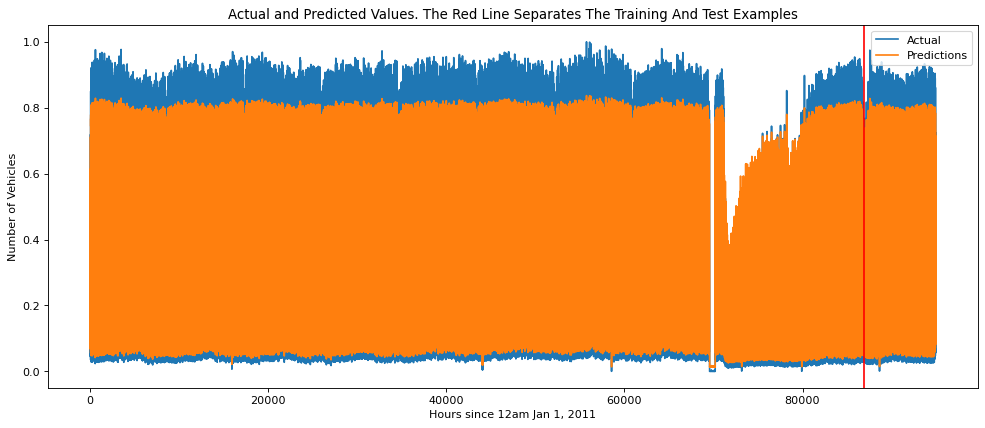

Unscaled Plot


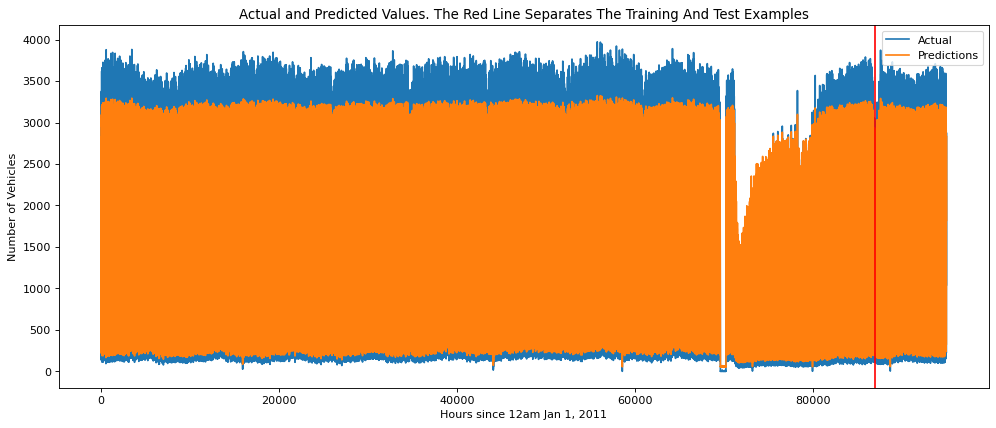

In [40]:
# Mean square error
# print_error(trainY, testY, train_predict, test_predict)
# print_error(trainY, testY, unscaled_train_predict, unscaled_test_predict)

# Print results
print("Unscaled train Predict")
print(unscaled_train_predict)
print("Unscaled Test Predict")
print(unscaled_test_predict)

print("Train Predict")
print(train_predict)
print("Test Predict")
print(test_predict)


# Mean square error
print("RMSE Error")
print_error(trainY, testY, train_predict, test_predict)
print("Unscaled Error")
print_error(unscale_trainY, unscale_testY, unscaled_train_predict, unscaled_test_predict)


# Plot Results
print("Plot")
plot_result(trainY, testY, train_predict, test_predict)
print("Unscaled Plot")
plot_result(unscale_trainY, unscale_testY, unscaled_train_predict, unscaled_test_predict)